# Optimal Bets and Profit for n-Outcome Arbitrage


This code implements the solution to the following theorem:

**Theorem 2 (Optimal Bets and Profit for n Outcomes):**
*Let $O_1:1, O_2:1, \ldots, O_n:1$ be the odds offered for n mutually exclusive outcomes, and let N be the total amount to bet. The optimal bet amount on outcome i, denoted by $x_i^*$, and the guaranteed profit, denoted by $p^*$, are given by:*

$$x_i^* = \frac{N}{\sum_{j=1}^n \frac{1}{1+O_j}} \cdot \frac{1}{1+O_i}$$

$$p^* = N \left(\frac{\prod_{i=1}^n (1+O_i)}{\sum_{j=1}^n \prod_{k \neq j} (1+O_k)} - 1\right)$$


The `calculate_optimal_bets` function below implements these formulas. Here's what it does:

1. It takes two inputs:
   - `odds`: A list or array of odds for each outcome. Odds must be of the form $O_i:1$.
   - `total_money`: The total amount of money available for betting

2. It calculates the optimal bet for each outcome using the formula for $x_i^*$

3. It calculates the guaranteed profit using the formula for $p^*$

4. It returns a tuple containing:
   - An array of optimal bet amounts for each outcome
   - The guaranteed profit


In [ ]:
import numpy as np

def calculate_optimal_bets(odds, total_money):

    # Convert odds to numpy array for easier calculations
    odds = np.array(odds)

    # Calculate the denominator for optimal bets formula
    denominator = np.sum(1 / (1 + odds))

    # Calculate optimal bets for each outcome
    optimal_bets = total_money / denominator * (1 / (1 + odds))

    # Calculate the guaranteed profit
    profit = total_money * (np.prod(1 + odds) / np.sum(np.prod(1 + odds) / (1 + odds)) - 1)

    return optimal_bets, profit

In [ ]:
  #example

  odds = [2.0,4.0, 5.0]
  total_money = 100

  optimal_bets, profit = calculate_optimal_bets(odds, total_money)

  print(f"Odds: {odds}")
  print(f"Total money: ${total_money}")
  print(f"Optimal bets: {optimal_bets}")
  print(f"Guaranteed profit: ${profit:.2f}")

    # Check if arbitrage opportunity exists
if np.sum(1 / (1 + np.array(odds))) < 1:
    print("Arbitrage opportunity exists!")
else:
    print("No arbitrage opportunity.")

Odds: [2.0, 4.0, 5.0]
Total money: $100
Optimal bets: [47.61904762 28.57142857 23.80952381]
Guaranteed profit: $42.86
Arbitrage opportunity exists!


# Probability to odds and odds to probability conversion

In [ ]:
def probability_to_odds(probability):
    """
    Convert probability to odds.

    Args:
    probability (float): A value between 0 and 1 representing the probability.

    Returns:
    float: The corresponding odds.
    """
    if probability <= 0 or probability >= 1:
        raise ValueError("Probability must be between 0 and 1")
    return (1 - probability) / probability

def odds_to_probability(odds):
    """
    Convert odds to probability.

    Args:
    odds (float): The odds value.

    Returns:
    float: The corresponding probability between 0 and 1.
    """
    return 1 / (odds + 1)





In [ ]:
# Example usage
prob = 0.2
print("Probability to Odds:")
odds = probability_to_odds(prob)
print(f"Probability: {prob:.2f}, Odds: {odds:.2f}")

print("\nOdds to Probability:")
odds=4.0
prob = odds_to_probability(odds)
print(f"Odds: {odds:.2f}, Probability: {prob:.2f}")


Probability to Odds:
Probability: 0.20, Odds: 4.00

Odds to Probability:
Odds: 4.00, Probability: 0.20


# Introduction to Options


## Option Terminology

Options are financial derivatives that give buyers the right, but not the obligation, to buy or sell an underlying asset at a specified price, known as the strike price, before a certain expiration date.

- **Long Position (Buying an Option):** The buyer of the option holds a long position. They have the right to exercise the option.
- **Short Position (Selling/Writing an Option):** The seller or writer of the option holds a short position. They have the obligation to fulfill the contract if the buyer exercises the option.


- **Call Option:** Gives the holder the right to buy the underlying asset.
- **Put Option:** Gives the holder the right to sell the underlying asset.

- **In the Money:**
  - For a call option, when the underlying asset price is above the strike price.
  - For a put option, when the underlying asset price is below the strike price.
- **At the Money:** The underlying asset's price is equal to the strike price.
- **Out of the Money:**
  - For a call option, when the underlying asset price is below the strike price.
  - For a put option, when the underlying asset price is above the strike price.

- **Expiration Date:** The date on which the option expires. If the option is not exercised by this date, it becomes worthless.

- **Premium:** The price paid by the buyer to the seller to acquire the rights that the option grants.


The profit for options can be calculated as follows:

- **Call Option Profit:**
  $$\text{Profit} = \max(S - E, 0) - \text{Premium}$$
  Where $S$ is the spot price of the underlying asset and $E$ is the strike price.

- **Put Option Profit:**
  $$\text{Profit} = \max(K - S, 0) - \text{Premium}$$
  Where $S$ is the spot price of the underlying asset and $E$ is the strike price.

## Option Strategies


In the context of options trading, a portfolio can be constructed using various combinations of call and put options. The profit or loss of these portfolios is evaluated at expiration time \( t = T \). Below, we discuss several types of option portfolios, their profit calculations, and the market expectations that might lead an investor to adopt each strategy.

Let $ C_E $ denote a call option with strike price $ E $, and $ P_E $ denote a put option with the same strike price. A negative sign (e.g., $ -C_E $) indicates a short position in the option.



1. **Long Call**: $\text{Port} = C_E $

2. **Short Call**: $ \text{Port} = -C_E $

3. **Long Put**: $ \text{Port} = P_E $
   
4. **Short Put**: $ \text{Port} = -P_E $
  
5. **Long Straddle**: $ \text{Port} = P_E + C_E $
  
6. **Short Straddle**: $ \text{Port} = -P_E - C_E $
   
7. **Long Strangle**: $ \text{Port} = P_{E1} + C_{E2} $
  
8. **Short Butterfly**: $ \text{Port} = -C_{E1} + 2C_{E2} - C_{E3} $
  
9. **Long Butterfly**: $ \text{Port} = C_{E1} - 2C_{E2} + C_{E3} $
   
10. **Short Condor**: $ \text{Port} = -C_{E1} + C_{E2} + C_{E3} - C_{E4} $

11. **Long Condor**: $ \text{Port} = C_{E1} - C_{E2} - C_{E3} + C_{E4} $

### calculate_option_payoff function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_option_payoff(strategy, strike, premium, stock_prices):
    """
    Calculate the payoff for a single option based on the strategy.
    """
    if strategy == "long_call":
        payoff = np.maximum(stock_prices - strike, 0) - premium
    elif strategy == "short_call":
        payoff = -np.maximum(stock_prices - strike, 0) + premium
    elif strategy == "long_put":
        payoff = np.maximum(strike - stock_prices, 0) - premium
    elif strategy == "short_put":
        payoff = -np.maximum(strike - stock_prices, 0) + premium
    else:
        raise ValueError("Invalid strategy")
    return payoff

def plot_options_strategies(strategies, stock_price_range):
    """
    Plot the profit/loss for a combination of option strategies.
    """

    stock_prices = np.linspace(stock_price_range[0], stock_price_range[1], 200)
    total_payoff = np.zeros_like(stock_prices)
    plt.figure(figsize=(12, 8))

    # Plotting each strategy's payoff separately
    for i, strategy in enumerate(strategies):
        payoff = calculate_option_payoff(strategy['type'], strategy['strike'], strategy['premium'], stock_prices)
        total_payoff += payoff
        plt.plot(stock_prices, payoff, label=f"{strategy['type'].replace('_', ' ').title()} (Strike: {strategy['strike']}, Premium: {strategy['premium']})", linestyle='--')

    # Plotting the total portfolio payoff
    plt.plot(stock_prices, total_payoff, label="Total Portfolio Profit", color='black', linewidth=2)

    # Adding annotations for strike prices and break-even points
    for strategy in strategies:
        plt.axvline(x=strategy['strike'], color='grey', linestyle=':', alpha=0.7)
        plt.text(strategy['strike'], 0, f"Strike: {strategy['strike']}", horizontalalignment='center', verticalalignment='bottom')

    # Setting up the graph with labels, legends, and grid
    plt.axhline(0, color='gray', lw=1)
    plt.xlabel("Stock Price at Expiration")
    plt.ylabel("Profit/Loss")
    plt.title("Profit/Loss for Combined Options Strategies")
    plt.legend()
    plt.grid(True)
    plt.show()



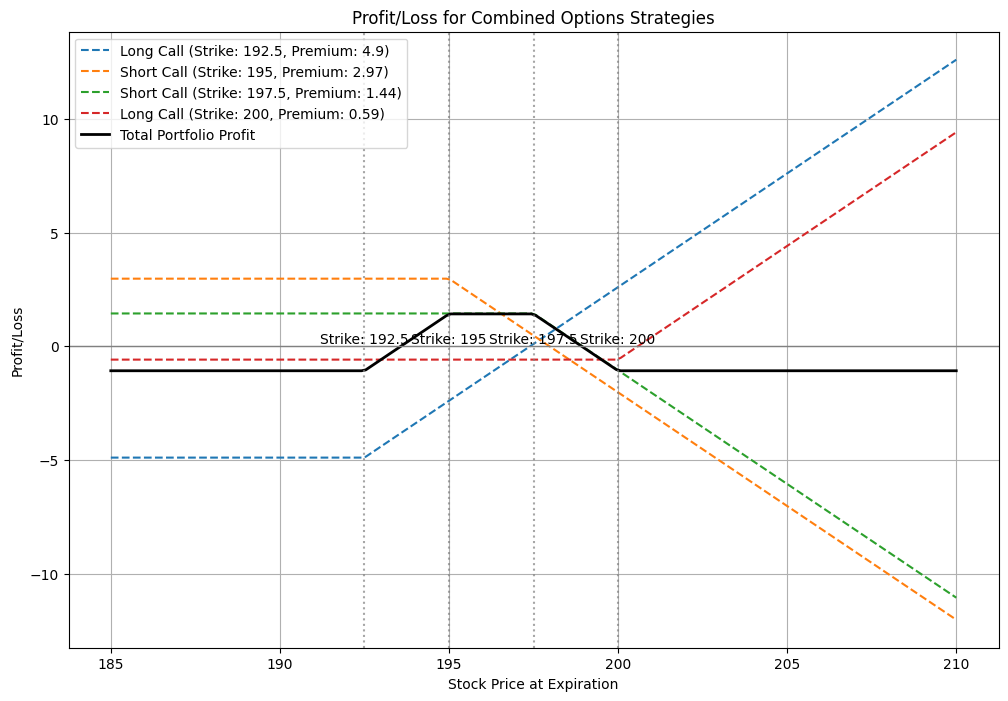

In [ ]:

# Example usage
strategies = [
    {"type": "long_call", "strike":192.5, "premium": 4.9},

    {"type": "short_call", "strike": 195, "premium":2.97},

    {"type": "short_call", "strike":197.5, "premium": 1.44},

    {"type": "long_call", "strike":200, "premium": .59},

]


plot_options_strategies(strategies, (185, 210))

## Put Call Parity




The put-call parity  principle in options pricing that explains the relationship between the price of call and put options with the same strike price and expiration date.

The put-call parity equation is given by:

$$ S + P_E(S, t) = C_E(S, t) + Ee^{-r(T-t)} $$

where:

- $ S $ is the current price of the stock (spot price).
- $ P_E(S, t) $ is the price of the put option with strike price $E $ and time $ t $ until expiration.
- $C_E(S, t) $ is the price of the call option with the same strike price and time to expiration as the put.
- $E$ is the strike price of the options.
- $ e^{-r(T-t)}$ is the present value factor for a risk-free bond that pays $ E $ at time $T $, with $ r$ being the continuously compounded risk-free interest rate and $ T-t $ being the time to maturity of the options.

The put-call parity shows that the price of a call option implies a certain fair price for the corresponding put option having the same strike price and expiration, and vice versa, given the current stock price and the risk-free rate.

### Arbitrage Put Call Parity

In [ ]:
import numpy as np

def put_call_parity_arb(C, P, E, S, r, T):
    """
    Check for arbitrage via put-call parity:

        C + E*e^{-rT}  ?  P + S

    - C: Call price
    - P: Put price
    - E: Strike price
    - S: Current stock price
    - r: Annualized risk-free rate (decimal), e.g. 0.05 for 5%
    - T: Time to maturity in years (e.g. 30 days = 30/365)

    Returns:
    - (arbitrage_amount, strategy)
    """
    # Present value of strike
    E_discounted = E * np.exp(-r * T)

    # Left-hand side (LHS) and right-hand side (RHS)
    LHS = C + E_discounted
    RHS = P + S

    if LHS > RHS:
        # LHS is overpriced => Sell Call, Buy Put, Borrow strike discount, Buy Stock
        arbitrage_amount = LHS - RHS
        strategy = (
            f"LHS > RHS by ${arbitrage_amount:.2f}: "
            "Sell the Call, Buy the Put, Borrow the Present Value of Strike, Buy the Stock."
        )
    elif LHS < RHS:
        # RHS is overpriced => Buy Call, Sell Put, Short Stock, Invest strike discount
        arbitrage_amount = RHS - LHS
        strategy = (
            f"RHS > LHS by ${arbitrage_amount:.2f}: "
            "Buy the Call, Sell the Put, Short the Stock, Invest the Present Value of Strike."
        )
    else:
        # No arbitrage
        arbitrage_amount = 0
        strategy = "No arbitrage. LHS == RHS."

    return arbitrage_amount, strategy


In [ ]:
# Given values
C = 1.44  # Price of the call option
P =  1.83 # Price of the put option
E = 197.5  # Strike price
S = 196.98  # Current stock price
r = 0.045 # Interest rate
T = 2/365  # Time to expiration in years
# Calculate the arbitrage amount and strategy
arbitrage_amount, strategy = put_call_parity_arb(C, P, E, S, r, T)

print(f"Arbitrage opportunity of ${arbitrage_amount:.2f} exists.")
print("Strategy:", strategy)

Arbitrage opportunity of $0.08 exists.
Strategy: LHS > RHS by $0.08: Sell the Call, Buy the Put, Borrow the Present Value of Strike, Buy the Stock.


In [ ]:
import yfinance as yf
from datetime import datetime
import pandas as pd
def find_put_call_arbitrage(ticker_symbol, expiration_date, r=0.005, strike_range=10):
    """
    1) Fetch the current stock price from Yahoo Finance.
    2) Fetch call & put data for a given expiration date.
    3) Filter by strikes within ± strike_range of the current stock price.
    4) Merge calls & puts on strike.
    5) Compute T (in years) until expiration_date.
    6) Check put-call parity for each strike to see if there's any arbitrage.

    Returns a formatted DataFrame.
    """
    # 1) Get current stock price
    ticker = yf.Ticker(ticker_symbol)
    hist = ticker.history(period="1d")
    if len(hist) == 0:
        raise ValueError("Could not fetch current stock data. Check ticker or network.")
    S = hist["Close"].iloc[-1]

    # 2) Fetch options chain
    options_chain = ticker.option_chain(expiration_date)
    calls = options_chain.calls
    puts = options_chain.puts

    # 3) Filter strikes
    #    Use .copy() to avoid SettingWithCopyWarning
    calls_filtered = calls.loc[
        (calls["strike"] >= S - strike_range) &
        (calls["strike"] <= S + strike_range)
    ].copy()

    puts_filtered = puts.loc[
        (puts["strike"] >= S - strike_range) &
        (puts["strike"] <= S + strike_range)
    ].copy()

    # Compute mid-prices
    calls_filtered["call_mid"] = (calls_filtered["bid"] + calls_filtered["ask"]) / 2.0
    puts_filtered["put_mid"] = (puts_filtered["bid"] + puts_filtered["ask"]) / 2.0

    calls_relevant = calls_filtered[["strike", "call_mid"]]
    puts_relevant = puts_filtered[["strike", "put_mid"]]

    # Merge on strike
    merged = calls_relevant.merge(puts_relevant, on="strike", how="inner")

    # 4) Compute time to maturity (T in years)
    exp_date = datetime.strptime(expiration_date, "%Y-%m-%d")
    now = datetime.now()
    days_to_expiry = (exp_date - now).days
    T = days_to_expiry / 365.0

    # 5) Check put-call parity
    results = []
    for _, row in merged.iterrows():
        strike = row["strike"]
        C = row["call_mid"]
        P = row["put_mid"]

        # Skip if we don't have valid (non-NaN) prices
        if np.isnan(C) or np.isnan(P):
            continue

        arbitrage_amount, strategy = put_call_parity_arb(C, P, strike, S, r, T)

        E_discounted = strike * np.exp(-r * T)
        LHS = C + E_discounted
        RHS = P + S

        results.append({
            "Strike": strike,
            "Call Price": C,
            "Put Price": P,
            "Stock Price": S,
            "PV(Strike)": E_discounted,
            "LHS": LHS,
            "RHS": RHS,
            "Arbitrage": arbitrage_amount,
            "Strategy": strategy
        })

    df_results = pd.DataFrame(results)
    # Sort by absolute arbitrage amount (descending)
    df_results.sort_values(
        by="Arbitrage",
        key=lambda x: x.abs(),
        ascending=False,
        inplace=True
    )

    # OPTIONAL: Round numeric columns for a cleaner display
    # (Feel free to adjust decimal places as needed)
    numeric_cols = ["Strike", "Call Price", "Put Price", "Stock Price",
                    "PV(Strike)", "LHS", "RHS", "Arbitrage"]
    for col in numeric_cols:
        df_results[col] = df_results[col].round(3)

    return df_results


In [ ]:
df_arbitrage = find_put_call_arbitrage(
         ticker_symbol="NVDA",
         expiration_date="2025-03-21",
         r=0.05,          # 0.5% annual risk-free rate
         strike_range=2   # Only look at strikes within ±$strike_range of the current stock price
     )
print(df_arbitrage)

   Strike  Call Price  Put Price  Stock Price  PV(Strike)      LHS     RHS  \
2   137.0      11.575      10.70       136.24     135.804  147.379  146.94   
1   136.0      12.050      10.55       136.24     134.813  146.863  146.79   
0   135.0      12.525      10.05       136.24     133.822  146.347  146.29   
3   138.0      11.100      11.70       136.24     136.795  147.895  147.94   

   Arbitrage                                           Strategy  
2      0.439  LHS > RHS by $0.44: Sell the Call, Buy the Put...  
1      0.073  LHS > RHS by $0.07: Sell the Call, Buy the Put...  
0      0.057  LHS > RHS by $0.06: Sell the Call, Buy the Put...  
3      0.045  RHS > LHS by $0.04: Buy the Call, Sell the Put...  
